## This is for the person will check this lab
+ this notebook has everything but using the csv with categorical numerical and targets ,adding then regression model,random forest,linear regresion, it has sampling and get to a conclusion at the end.

In [58]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold 
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_validate

In [2]:
categorical = pd.read_csv('categorical.csv')
numerical = pd.read_csv('numerical.csv')
targets = pd.read_csv('target.csv')

code to chose categroicals

In [4]:
def disc_cont(df):
    
    discrete_col = []
    continuous_col = []
    
    # if unique value count more than %0.00015 in a column -> continuous
    # else -> discrete
    
    for col in df.columns:
        if len(df[col].unique())/len(df[col]) > 0.00015:
            continuous_col.append(col)
        
        else:
            discrete_col.append(col)
            
    return discrete_col, continuous_col

In [5]:
disc_num, cont_num = disc_cont(numerical)

In [6]:
to_categorical = numerical[['HV3', 'HV4', 'ANC6', 'MHUC2', 'HPHONE_D', 'RFA_2F']]


In [7]:
numerical = numerical.drop(columns=['HV3', 'HV4', 'ANC6', 'MHUC2', 'HPHONE_D', 'RFA_2F'], axis=1)


## Feature selection with Variance Treshold

In [8]:
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(numerical)

In [9]:
var_threshold = 0.02
sel = VarianceThreshold(threshold=(var_threshold))


# This drops the columns that have a variance less than this threshold
sel = sel.fit(numerical_scaled)
temp = sel.transform(numerical_scaled)
temp = pd.DataFrame(temp)
print(numerical_scaled.shape)
print(temp.shape)

(95412, 309)
(95412, 74)


In [10]:
sel.variances_ > var_threshold
sel.get_support()
var_list = list(sel.get_support())

In [11]:
drop_num = [col[0] for col in zip(numerical.columns, var_list) if col[1] == False]  #list of low variance columns: to be dropped
#drop_num

In [12]:
numerical = numerical.drop(columns=drop_num, axis=1)

### Cleaning categoricals 

In [13]:
categorical = pd.concat((categorical,to_categorical),axis=1)


In [14]:
for col in categorical.columns:
    categorical[col] = categorical[col].astype('object')
    print(categorical[col].value_counts())

other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: STATE, dtype: int64
40    6295
35    3624
36    3617
27    3553
24    3539
49    3315
12    3000
18    2897
13    2706
30    2607
39    2601
45    2515
43    2385
11    2378
51    2322
14    2246
41    2176
44    1953
16    1947
2     1942
21    1891
8     1828
10    1804
46    1800
28    1630
17    1621
20    1568
53    1441
3     1428
34    1358
42    1358
23    1324
31    1285
22    1282
25    1275
38    1200
15    1173
1     1140
7     1076
5     1014
37     972
26     947
47     868
29     859
32     795
48     787
50     776
9      770
6      603
33     593
4      561
19     497
52     270
Name: CLUSTER, dtype: int64
H    74582
U    20830
Name: HOMEOWNR, dtype: int64
F        54234
M        39094
other     2084
Name: GENDER, dtype: int64
3    64829
2    23455
1     7128
Name: DATASRCE, dtype: int6

In [15]:
categorical = categorical.drop(columns=['RFA_2R', 'ODATEW_YR', 'ODATEW_MM', 'DOB_YR', 'DOB_MM', 'MINRDATE_YR', 'MAXRDATE_YR',
       'LASTDATE_YR','FIRSTDATE_YR'], axis=1)

In [16]:
all_data = pd.concat((categorical,numerical,targets),axis=1)
print(all_data.shape)
all_data.head()

(95412, 95)


,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,MINRDATE_MM,MAXRDATE_MM,LASTDATE_MM,FIRSTDATE_MM,HV3,HV4,ANC6,MHUC2,HPHONE_D,RFA_2F,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW2,DW4,DW5,DW6,HV1,HV2,HU1,HU2,HU5,HHD2,HHD3,HHD5,ETHC2,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR2,HUPA2,HUPA3,HUPA6,RP1,RP2,RP3,RP4,MSA,ADI,IC6,HHAS3,MC1,MC2,PEC2,TPE13,LFC2,LFC4,LFC6,LFC7,LFC8,LFC9,VC1,VC3,POBC2,LSC1,VOC2,HC2,HC4,HC5,HC6,HC7,HC8,HC11,HC13,HC17,HC18,HC19,MHUC1,CARDPROM,CONTROLN,CLUSTER2,TARGET_B,TARGET_D
0,IL,36,H,F,3,E,C,T,2,8,2,12,11,3,2,0,2,0,4,60.000000,5,9,34,18,5,0,35,65,92,1,49,97,95,2,0,0,479,635,86,14,7,80,70,84,50,2,7,13,27,47,0,61,0,0,0,2,5,17,73,0.0,177.0,13,51,46,54,13,45,64,64,62,53,99,0,34,18,74,88,77,31,14,14,31,54,46,90,10,33,65,40,6,27,95515,39,0,0.0
1,CA,14,H,M,3,G,A,S,1,10,12,12,10,12,10,1,4,0,2,46.000000,6,9,55,11,9,99,0,0,67,0,75,99,99,0,0,0,5468,5218,96,4,9,94,88,95,44,97,98,98,98,99,94,83,0,0,0,91,91,91,94,4480.0,13.0,2,66,56,44,2,71,83,81,64,57,99,99,55,11,39,50,92,10,26,56,97,99,0,96,4,99,0,99,20,12,148535,1,0,0.0
2,NC,43,U,M,3,E,C,R,2,11,7,12,1,2,1,0,2,1,4,61.611649,3,1,29,33,1,0,2,98,96,2,44,69,69,6,5,3,497,546,78,22,18,76,65,86,60,0,1,6,18,50,0,36,2,24,3,0,2,9,44,0.0,281.0,32,31,38,62,21,61,73,70,78,62,82,99,28,32,84,96,65,22,12,23,50,69,31,0,35,22,77,17,9,26,15078,60,0,0.0
3,CA,44,U,F,3,E,C,R,2,11,11,12,2,2,1,0,2,1,4,70.000000,1,4,14,31,0,0,8,92,61,0,50,85,83,4,1,0,1000,1263,48,52,6,73,61,84,36,10,25,50,69,92,10,42,0,9,0,1,8,17,34,9340.0,67.0,27,26,46,54,17,43,81,68,33,31,0,99,14,31,67,56,43,38,10,19,39,45,55,45,17,23,77,22,16,27,172556,41,0,0.0
4,FL,16,H,F,3,F,A,S,2,10,1,1,3,4,3,0,2,1,2,78.000000,3,2,9,53,9,99,0,0,2,98,57,99,98,0,0,0,576,594,90,10,0,82,49,92,1,0,1,2,16,67,0,45,0,0,0,25,58,74,83,5000.0,127.0,24,11,20,80,1,76,73,65,80,31,81,99,9,53,65,99,45,34,1,3,6,33,67,9,72,99,1,21,6,43,7112,26,0,0.0


In [17]:
# save data for later use in models
all_data.to_csv('all_data.csv', index = False)
categorical.to_csv('categorical_c.csv',index = False)
numerical.to_csv('numerical_c.csv',index = False)

In [18]:
# going to drop TARGET_D for first model
data = all_data.drop(columns=['TARGET_D'], axis=1)

### Oversample

In [19]:
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [21]:
# X/y split
X = data.drop('TARGET_B',axis = 1)
y = data['TARGET_B']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # default fraction is .2
X_train_imb = pd.DataFrame(X_train)
trainset = pd.concat((X_train, y_train), axis=1)


In [23]:
category_0 = trainset[trainset['TARGET_B'] == 0]
category_1 = trainset[trainset['TARGET_B'] == 1]
category_1_oversampled = resample(category_1, 
                                  replace=True, 
                                  n_samples = len(category_0))
train_upsampled = pd.concat([category_1_oversampled, category_0], axis=0)


In [24]:
train_upsampled = train_upsampled.sample(frac =1)
train_upsampled['TARGET_B'].value_counts()

1    67970
0    67970
Name: TARGET_B, dtype: int64

+ now again I will do X-y split to my trainset because I will one hot encode my categoricals and scale numericals
+ I don't need to scale numericals for Random Forest but I will try logistic regression model too, so preferred to do it now

In [25]:
X_train = train_upsampled.drop('TARGET_B',axis = 1)
y_train = train_upsampled['TARGET_B']

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [30]:
#splitting into categorical and numerical
X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)

X_test_num = X_test.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)

In [31]:
# for both scaling and encoding, I will fit it to my train set, use the same transformer to my test set
transformer = MinMaxScaler().fit(X_train_num) 
numericals_train_scaled = transformer.transform(X_train_num)
numericals_test_scaled = transformer.transform(X_test_num)

In [32]:

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_train_cat)
categoricals_train_encoded = encoder.transform(X_train_cat).toarray()
categoricals_test_encoded = encoder.transform(X_test_cat).toarray()

In [33]:
X_train = np.concatenate((numericals_train_scaled,categoricals_train_encoded),axis=1)
X_test = np.concatenate((numericals_test_scaled,categoricals_test_encoded),axis=1)
X_train = pd.DataFrame(X_train)
X_train.shape

(135940, 247)

In [35]:
# apply logistic regression
LR = LogisticRegression(random_state=0, solver='saga')
LR.fit(X_train, y_train)
LR.score(X_test, y_test) 

0.6067161363350522

In [36]:
pred = LR.predict(X_test)
confusion_matrix(y_test,pred)

array([[13818,  8781],
       [  600,   654]], dtype=int64)

In [37]:
print("precision: ",precision_score(y_test,pred))    # true pos / true pos+false pos
print("recall: ",recall_score(y_test,pred))    #recall is most important, true pos/true pos + false neg
print("f1: ",f1_score(y_test,pred))

precision:  0.06931637519872814
recall:  0.5215311004784688
f1:  0.12236879034521471


In [39]:
# now go with random forest clasifier
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.2,
                             random_state = 42)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.6222303957628366
0.5772020290948727


0    22599
1     1254
Name: TARGET_B, dtype: int64

array([[13053,  9546],
       [  539,   715]], dtype=int64)

In [40]:
# ok so now lets go with the last part lets go from the begining

In [41]:
categorical = pd.read_csv('categorical_c.csv')
numerical = pd.read_csv('numerical_c.csv')
targets = pd.read_csv('target.csv')
for col in categorical.columns:
    categorical[col] = categorical[col].astype('object')
all_data = pd.concat((categorical,numerical,targets),axis=1)

eliminate non donors

In [42]:
donated = pd.DataFrame(all_data[all_data['TARGET_B'] == 1]['TARGET_D'])
donated

,TARGET_D
20,4.0
30,7.0
45,5.0
78,13.0
93,10.0
...,...
95298,20.0
95309,15.0
95398,3.0
95403,10.0


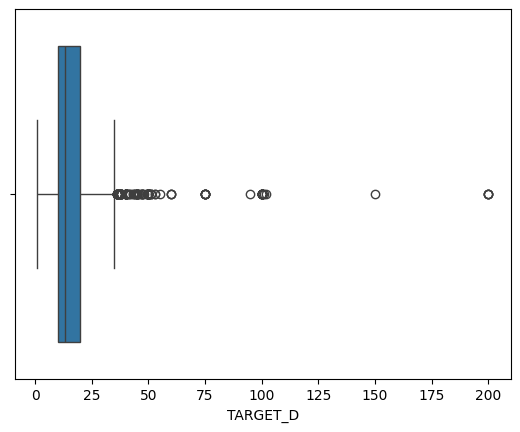

In [45]:
sns.boxplot(x=donated['TARGET_D'])
plt.show()

In [46]:
all_data = all_data.sample(frac=1)

In [48]:
# going to drop TARGET_B column because I already selected the ones who donated
data = all_data.drop(columns=['TARGET_B'], axis=1)

In [49]:
#so go withthe regression model
# X/y split
X = data.drop('TARGET_D',axis = 1)
y = data['TARGET_D']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # default fraction is .2
X_train_num = X_train.select_dtypes(include=np.number)
X_train_cat = X_train.select_dtypes(include = object)


X_test_num = X_test.select_dtypes(include=np.number)
X_test_cat = X_test.select_dtypes(include = object)

In [50]:
transformer = MinMaxScaler().fit(X_train_num) 
numericals_train_scaled = transformer.transform(X_train_num)
numericals_test_scaled = transformer.transform(X_test_num)

In [51]:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_train_cat)
categoricals_train_encoded = encoder.transform(X_train_cat).toarray()
categoricals_test_encoded = encoder.transform(X_test_cat).toarray()

In [52]:
X_train = np.concatenate((numericals_train_scaled,categoricals_train_encoded),axis=1)
X_test = np.concatenate((numericals_test_scaled,categoricals_test_encoded),axis=1)

In [57]:
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions_test = lm.predict(X_test)
r2_score = r2_score(y_test, predictions_test) 

In [59]:
# apply cross validation to the model
results = cross_validate(lm,X_train, y_train, cv = 5)


In [60]:
print(results['test_score'])
print(results['test_score'].mean())

[-6.07901127e+16  6.02061791e-02 -7.93090737e+18  5.48980062e-02
  6.07343790e-02]
-1.5983394965882348e+18


In [61]:
y_test.mean()

0.05257200352156961

In [62]:
predictions_test.mean()

0.4718118702066433

## Now I will apply my models to the dataset

In [63]:
# X/y split
X = all_data.drop(['TARGET_D','TARGET_B'],axis = 1)
y = all_data['TARGET_B']
X.shape

(95412, 93)

In [64]:
#splitting into categorical and numerical
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include= object)

In [65]:
numericals_scaled = MinMaxScaler().fit_transform(X_num) 

In [66]:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat)
categoricals_encoded = encoder.transform(X_cat).toarray()

In [67]:
X = np.concatenate((numericals_scaled,categoricals_encoded),axis=1)
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246
0,0.649485,0.833333,1.000000,0.191919,0.353535,1.000000,1.0,0.000000,0.000000,0.989899,0.010101,0.363636,0.696970,0.686869,0.303030,0.161616,0.101010,0.138833,0.138833,0.727273,0.282828,0.000000,0.686869,0.575758,0.848485,0.595960,0.000000,0.000000,0.080808,0.717172,1.000000,0.000000,0.565657,0.040404,0.000000,0.090909,0.090909,0.636364,0.919192,0.949495,0.542735,0.170507,0.141414,0.646465,0.494949,0.515152,0.191919,0.626263,0.838384,0.818182,0.727273,0.505051,1.000000,0.000000,0.181818,0.161616,0.757576,0.969697,0.454545,0.980769,0.000000,0.000000,0.000000,0.000000,1.000000,0.848485,0.000000,1.000000,0.000000,1.000000,0.428571,0.383333,0.402241,0.295082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.624862,0.166667,0.666667,0.444444,0.222222,1.000000,1.0,0.000000,0.000000,0.646465,0.353535,0.474747,0.686869,0.676768,0.282828,0.272727,0.242424,0.086000,0.088167,0.585859,0.424242,0.010101,0.757576,0.555556,0.878788,0.424242,0.000000,0.000000,0.010101,0.101010,0.535354,0.000000,0.343434,0.181818,0.040404,0.212121,0.030303,0.090909,0.383838,0.858586,0.470085,0.490015,0.303030,0.313131,0.606061,0.404040,0.080808,0.707071,0.777778,0.737374,0.707071,0.434343,0.787879,0.939394,0.323232,0.252525,0.747475,0.969697,0.545455,0.442308,0.010101,0.060606,0.353535,0.949495,0.060606,0.777778,0.202020,1.000000,0.000000,0.989899,0.238095,0.400000,0.023120,0.393443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.711340,0.333333,0.333333,0.333333,0.353535,0.333333,0.0,0.000000,1.000000,1.000000,0.000000,0.343434,0.959596,0.959596,0.010101,0.000000,0.000000,0.112500,0.125167,0.929293,0.080808,0.979798,0.848485,0.808081,0.919192,0.565657,0.030303,0.060606,0.171717,0.393939,0.707071,0.010101,0.434343,0.000000,0.030303,0.000000,0.000000,0.000000,0.434343,0.575758,0.239316,0.585253,0.191919,0.474747,0.434343,0.575758,

In [68]:
y_pred = clf.predict(X)
display(y.value_counts())
display(confusion_matrix(y, y_pred))

0    90569
1     4843
Name: TARGET_B, dtype: int64

array([[52442, 38127],
       [ 1747,  3096]], dtype=int64)

In [69]:
y_pred = pd.Series(y_pred, name='pred_Target_B')
y_pred

0        0
1        1
2        0
3        0
4        0
        ..
95407    1
95408    0
95409    1
95410    1
95411    0
Name: pred_Target_B, Length: 95412, dtype: int64

In [70]:
data = pd.concat([all_data, y_pred], axis=1)

In [71]:
### Now I will apply Linear Regression
# X/y split
X = all_data.drop(['TARGET_D','TARGET_B'],axis = 1)
y = all_data['TARGET_D']
X.shape

(95412, 93)

In [72]:
X = np.concatenate((numericals_scaled,categoricals_encoded),axis=1)
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246
0,0.649485,0.833333,1.000000,0.191919,0.353535,1.000000,1.0,0.000000,0.000000,0.989899,0.010101,0.363636,0.696970,0.686869,0.303030,0.161616,0.101010,0.138833,0.138833,0.727273,0.282828,0.000000,0.686869,0.575758,0.848485,0.595960,0.000000,0.000000,0.080808,0.717172,1.000000,0.000000,0.565657,0.040404,0.000000,0.090909,0.090909,0.636364,0.919192,0.949495,0.542735,0.170507,0.141414,0.646465,0.494949,0.515152,0.191919,0.626263,0.838384,0.818182,0.727273,0.505051,1.000000,0.000000,0.181818,0.161616,0.757576,0.969697,0.454545,0.980769,0.000000,0.000000,0.000000,0.000000,1.000000,0.848485,0.000000,1.000000,0.000000,1.000000,0.428571,0.383333,0.402241,0.295082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.624862,0.166667,0.666667,0.444444,0.222222,1.000000,1.0,0.000000,0.000000,0.646465,0.353535,0.474747,0.686869,0.676768,0.282828,0.272727,0.242424,0.086000,0.088167,0.585859,0.424242,0.010101,0.757576,0.555556,0.878788,0.424242,0.000000,0.000000,0.010101,0.101010,0.535354,0.000000,0.343434,0.181818,0.040404,0.212121,0.030303,0.090909,0.383838,0.858586,0.470085,0.490015,0.303030,0.313131,0.606061,0.404040,0.080808,0.707071,0.777778,0.737374,0.707071,0.434343,0.787879,0.939394,0.323232,0.252525,0.747475,0.969697,0.545455,0.442308,0.010101,0.060606,0.353535,0.949495,0.060606,0.777778,0.202020,1.000000,0.000000,0.989899,0.238095,0.400000,0.023120,0.393443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.711340,0.333333,0.333333,0.333333,0.353535,0.333333,0.0,0.000000,1.000000,1.000000,0.000000,0.343434,0.959596,0.959596,0.010101,0.000000,0.000000,0.112500,0.125167,0.929293,0.080808,0.979798,0.848485,0.808081,0.919192,0.565657,0.030303,0.060606,0.171717,0.393939,0.707071,0.010101,0.434343,0.000000,0.030303,0.000000,0.000000,0.000000,0.434343,0.575758,0.239316,0.585253,0.191919,0.474747,0.434343,0.575758,

In [73]:
lm.fit(X,y)
predictions = lm.predict(X)
predictions = pd.Series(predictions, name='pred_Target_D')

In [74]:
data = pd.concat([data, predictions], axis=1)

In [75]:
result = data[['TARGET_B','TARGET_D','pred_Target_B','pred_Target_D']]
result.head()

,TARGET_B,TARGET_D,pred_Target_B,pred_Target_D
46355,0,0.0,1,0.849104
21471,0,0.0,0,1.717817
82366,0,0.0,0,0.575956
9988,0,0.0,1,0.394285
17220,0,0.0,0,0.793961


In [76]:
result['pred_Target_B'].value_counts()

0    54189
1    41223
Name: pred_Target_B, dtype: int64

In [77]:
result.groupby(['pred_Target_B']).agg({'pred_Target_D':sum}).reset_index()

,pred_Target_B,pred_Target_D
0,0,41338.980446
1,1,34328.346607


## CONCLUSION :
+ According to the models, we may send letters to 41244 people whom we predicted will donate
+ We expect that they will donate 34930 dolars total, 0.84 cent per persom